In [4]:
import os
os.chdir('..')

In [6]:
from pathlib import Path
import json

In [56]:
data_dir = Path('data')/'deepfashion'

train_dir = data_dir/'train'
train_coco_path = train_dir/'train_coco.json'
train_til_coco_path = train_dir/'train_til_coco.json'
train_img_dir = train_dir/'image'

val_dir = data_dir/'validation'
val_coco_path = val_dir/'val_coco.json'
val_til_coco_path = val_dir/'val_til_coco.json'
val_img_dir = val_dir/'image'

til_coco_path = Path('assets')/'train_clean.json'


# COCO

In [39]:
with til_coco_path.open('r') as f:
    til_coco = json.load(f)

In [19]:
with train_coco_path.open('r') as f:
    train_coco = json.load(f)

with val_coco_path.open('r') as f:
    val_coco = json.load(f)

In [20]:
train_coco.keys()

dict_keys(['images', 'annotations', 'categories'])

In [40]:
train_coco['categories']

[{'id': 1, 'name': 'short_sleeved_shirt'},
 {'id': 2, 'name': 'long_sleeved_shirt'},
 {'id': 3, 'name': 'short_sleeved_outwear'},
 {'id': 4, 'name': 'long_sleeved_outwear'},
 {'id': 5, 'name': 'vest'},
 {'id': 6, 'name': 'sling'},
 {'id': 7, 'name': 'shorts'},
 {'id': 8, 'name': 'trousers'},
 {'id': 9, 'name': 'skirt'},
 {'id': 10, 'name': 'short_sleeved_dress'},
 {'id': 11, 'name': 'long_sleeved_dress'},
 {'id': 12, 'name': 'vest_dress'},
 {'id': 13, 'name': 'sling_dress'}]

In [41]:
til_coco['categories']

[{'id': 1, 'name': 'tops'},
 {'id': 2, 'name': 'trousers'},
 {'id': 3, 'name': 'outerwear'},
 {'id': 4, 'name': 'dresses'},
 {'id': 5, 'name': 'skirts'}]

In [42]:
deepfashion_to_til = {
    1: 1,  # short_sleeved_shirt -> tops
    2: 2,  # long_sleeved_shirt -> tops
    3: 3,  # short_sleeved_outwear -> outerwear
    4: 3,  # long_sleeved_outwear -> outerwear
    5: 1,  # vest -> tops
    6: 1,  # sling -> tops
    7: 2,  # shorts -> trousers
    8: 2,  # trousers -> trousers
    9: 5,  # skirt -> skirts
    10: 4, # short_sleeved_dress -> dresses
    11: 4, # long_sleeved_dress -> dresses
    12: 4, # vest_dress -> dresses
    13: 4, # sling_dress -> dresses
}

# Viz

In [27]:
from detectron2.data.datasets import register_coco_instances, load_coco_json
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
import cv2
import random
from PIL import Image
import matplotlib.pyplot as plt

In [30]:
train_dataset_dicts = load_coco_json(train_coco_path, train_img_dir)
val_dataset_dicts = load_coco_json(val_coco_path, val_img_dir)

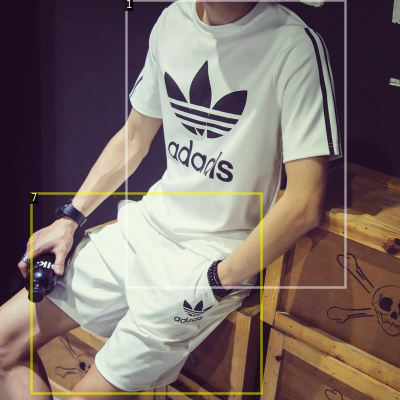

In [51]:
for d in random.sample(train_dataset_dicts, 1):
    img = cv2.imread(d['file_name'])
    visualizer = Visualizer(img[:, :, ::-1], scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    img = Image.fromarray(vis.get_image())

img

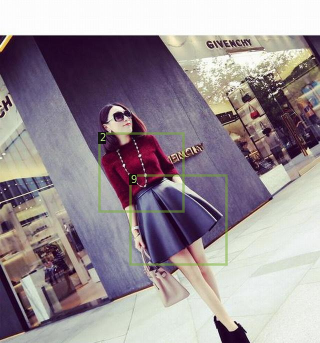

In [52]:
for d in random.sample(val_dataset_dicts, 1):
    img = cv2.imread(d['file_name'])
    visualizer = Visualizer(img[:, :, ::-1], scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    img = Image.fromarray(vis.get_image())

img

# Convert to TIL2020 format

In [54]:
train_coco['annotations'][0]

{'area': 43400,
 'bbox': [249, 423, 217, 200],
 'category_id': 8,
 'id': 1,
 'image_id': 1}

In [55]:
for coco in (train_coco, val_coco):
    coco['categories'] = til_coco['categories']

    # Change annotation category ids
    for anno in coco['annotations']:
        cat_id = anno['category_id']
        anno['category_id'] = deepfashion_to_til[cat_id]

In [57]:
with train_til_coco_path.open('w') as f:
    json.dump(train_coco, f)

with val_til_coco_path.open('w') as f:
    json.dump(val_coco, f)